
# t-SNE y UMAP en MNIST
Aplicar **t-SNE** y **UMAP** al dataset **MNIST** para visualización
de alta dimensionalidad en 2D y 3D.



## 1. Librerías


In [ ]:
!pip install umap-learn

In [ ]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from time import time

from sklearn.datasets import fetch_openml


## 2. Carga del dataset
Cargar **MNIST** desde `openml`
Para acelerar los ejemplos de t-SNE/UMAP, se puede muestrear el dataset.


In [ ]:
def load_data(max_samples=10000, random_state=42):
    X, y, name = None, None, None
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data.astype(np.float32)
    y = mnist.target.astype(int)
    name = "MNIST (OpenML)"

    # Muestreo para acelerar
    if max_samples is not None:
        rng = np.random.RandomState(random_state)
        idx = rng.choice(X.shape[0], size=max_samples, replace=False)
        X = X[idx]
        y = y[idx]
    return X, y, name

X, y, dataset_name = load_data(max_samples=2000, random_state=42)
X.shape, np.unique(y).shape, dataset_name


((2000, 784), (10,), 'MNIST (OpenML)')

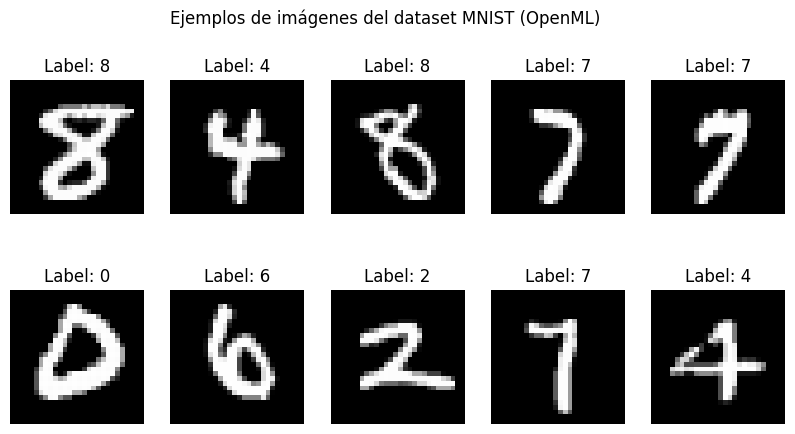

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")

plt.suptitle(f"Ejemplos de imágenes del dataset {dataset_name}")
plt.show()


## 3. Preprocesamiento
- Escalaremos las características con `StandardScaler`
- El PCA antes de t-SNE puede reducir ruido y acelerar el proceso.


In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

# PCA previa
pca = PCA(n_components=min(180, X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_.sum()
print(f"Dimensión tras PCA: {X_pca.shape}, varianza explicada acumulada: {explained:.3f}")

Dimensión tras PCA: (2000, 180), varianza explicada acumulada: 0.925



## 4. t-SNE en 2D
Ajustamos parámetros comunes: `perplexity`, `learning_rate`, `n_iter`.


In [ ]:
t0 = time()
tsne2 = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', max_iter=1000, random_state=42)
X_tsne2 = tsne2.fit_transform(X_pca)
t_tsne2 = time() - t0
print(f"Tiempo t-SNE: {t_tsne2:.2f}s")

Tiempo t-SNE: 27.52s


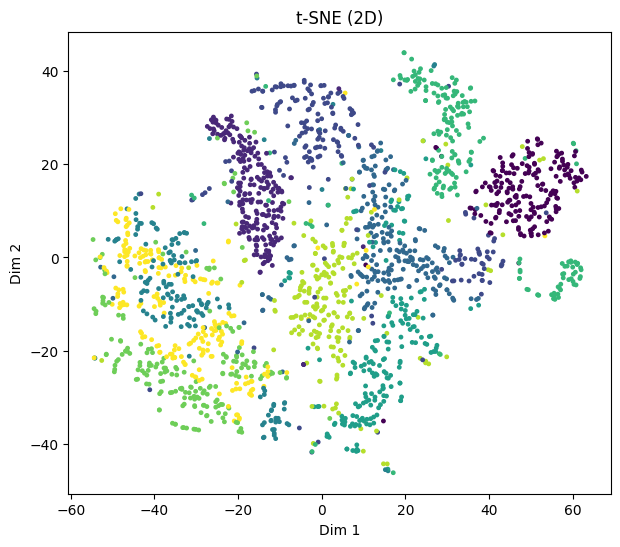

In [ ]:
plt.figure(figsize=(7,6))
scatter = plt.scatter(X_tsne2[:,0], X_tsne2[:,1], c=y, s=6)
plt.title("t-SNE (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


### t-SNE en 3D

In [ ]:
t0 = time()
tsne3 = TSNE(n_components=3, perplexity=30, learning_rate='auto', init='pca', max_iter=1000, random_state=42)
X_tsne3 = tsne3.fit_transform(X_pca)
t_tsne3 = time() - t0
print(f"Tiempo t-SNE: {t_tsne3:.2f}s")

Tiempo t-SNE: 59.18s


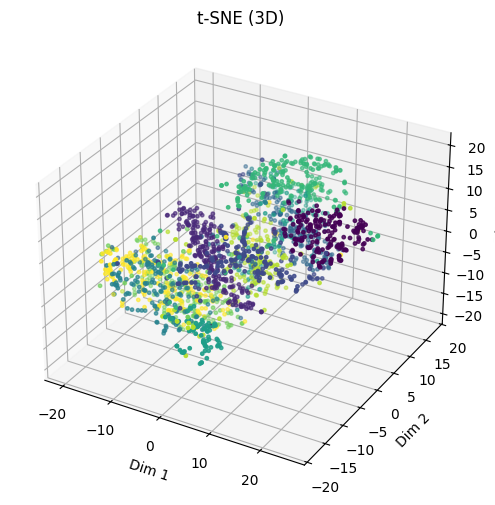

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:,0], X_tsne3[:,1], X_tsne3[:,2], c=y, s=6)
ax.set_title("t-SNE (3D)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
plt.show()


### Exploración de `perplexity`
Probamos distintos valores para ver su efecto en la separación visual.


Perplexity=5 -> 12.45s


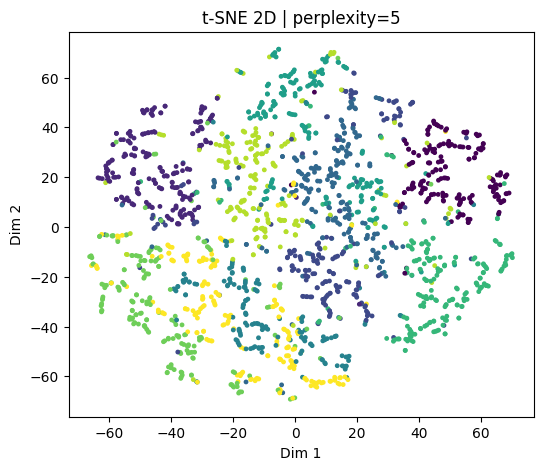

Perplexity=30 -> 15.46s


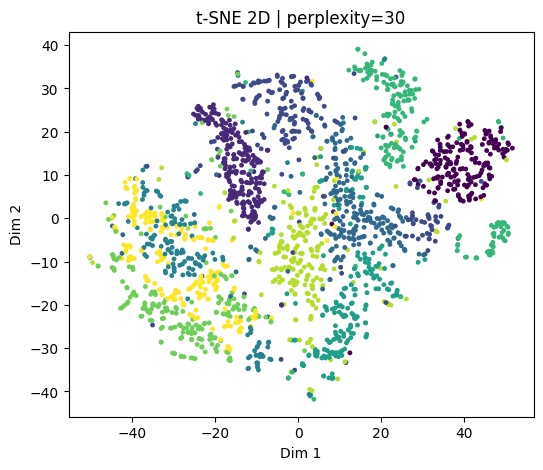

Perplexity=50 -> 15.68s


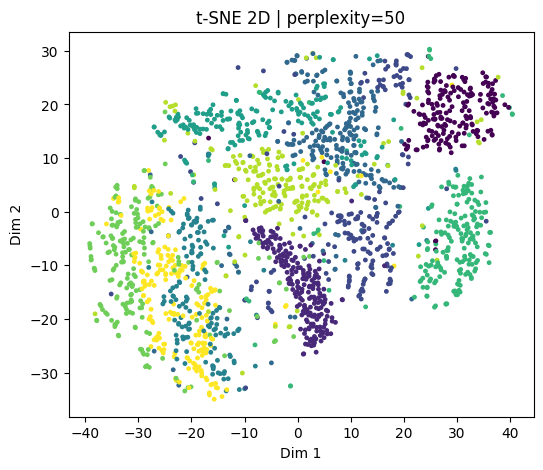

In [ ]:
for perp in [5, 30, 50]:
    t0 = time()
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate='auto', init='pca', max_iter=700, random_state=42)
    X_tsne = tsne.fit_transform(X_pca)
    print(f"Perplexity={perp} -> {time()-t0:.2f}s")
    plt.figure(figsize=(6,5))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, s=6)
    plt.title(f"t-SNE 2D | perplexity={perp}")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.show()



## 5. UMAP en 2D
Hiperparámetros clave: `n_neighbors` y `min_dist`.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tiempo UMAP 2D: 17.01s


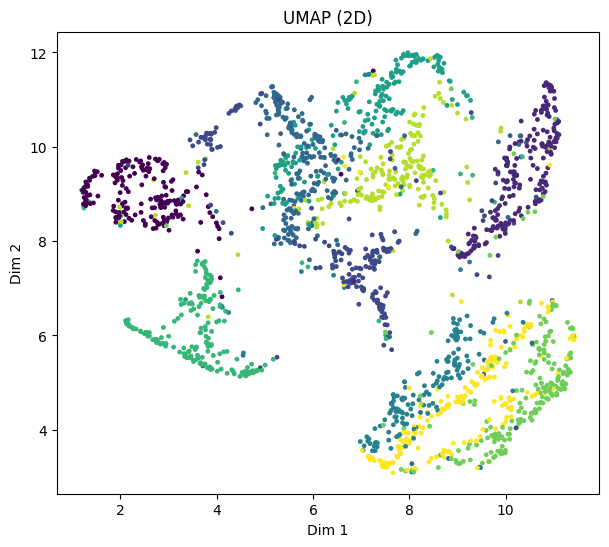

In [ ]:
t0 = time()
umap2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap2 = umap2.fit_transform(X_pca)
t_umap2 = time() - t0
print(f"Tiempo UMAP 2D: {t_umap2:.2f}s")

plt.figure(figsize=(7,6))
plt.scatter(X_umap2[:,0], X_umap2[:,1], c=y, s=6)
plt.title("UMAP (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


### UMAP en 3D


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tiempo UMAP 8.70s


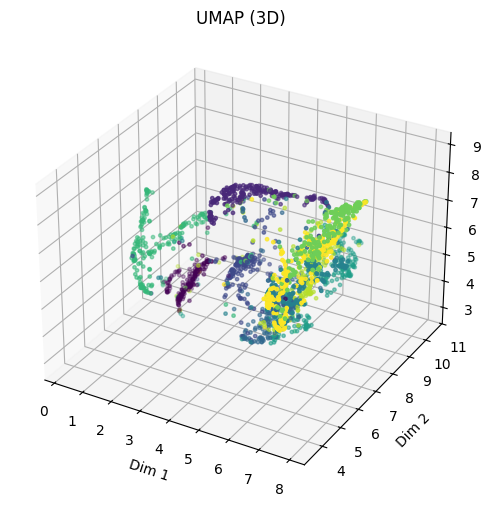

In [ ]:
t0 = time()
umap3 = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap3 = umap3.fit_transform(X_pca)
t_umap3 = time() - t0
print(f"Tiempo UMAP {t_umap3:.2f}s")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap3[:,0], X_umap3[:,1], X_umap3[:,2], c=y, s=6)
ax.set_title("UMAP (3D)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
plt.show()

# Actividad
Vamos a visualizar este dataset usando t-SNE y UMAP. Para esto haga lo siguiente:

* Aplique min-max scaler al dataset.
* Transforme el dataset con PCA para retener el ~95% de la varianza.
* Sobre el dataset, construya una proyección t-SNE. Justifique la elección de parámetros.
* Visualice su proyección usando los códigos vistos en clase. Modifíquelos para que funcionen sobre este dataset.
* Sobre el dataset, construya una proyección UMAP. Justifique la elección de parámetros.
* ¿Qué puede identificar en estas visualizaciones?
* Cuanto termine, me avisa para entregarle una L (logrado).
* Recuerde que las L otorgan un bono en la nota final de la asignatura.
* Pueden trabajar de a dos o tres.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler

# Etiquetas para Fashion-MNIST
FASHION_LABELS = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [ ]:
def load_data(max_samples=10000, random_state=42):
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    X_full = np.vstack([X_train, X_test]).astype(np.float32)
    y_full = np.hstack([y_train, y_test]).astype(int)
    name = "Fashion-MNIST (Keras)"
    # Aplanar imágenes (n, 784)
    X_full = X_full.reshape(X_full.shape[0], -1)
    # Muestreo opcional para acelerar
    if max_samples is not None and X_full.shape[0] > max_samples:
        rng = np.random.default_rng(seed=random_state)
        idx = rng.choice(X_full.shape[0], size=max_samples, replace=False)
        X_full = X_full[idx]
        y_full = y_full[idx]
    return X_full, y_full, name

X, y, dataset_name = load_data(max_samples=10000, random_state=42)
X.shape, np.unique(y).shape, dataset_name


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((10000, 784), (10,), 'Fashion-MNIST (Keras)')

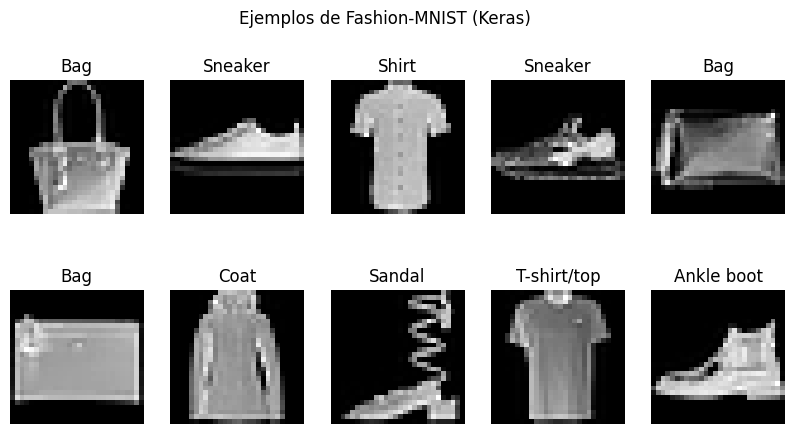

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"{FASHION_LABELS[y[i]]}")
    ax.axis("off")
plt.suptitle(f"Ejemplos de {dataset_name}")
plt.show()